# DT Assignment2 - 12기 김탁영

In [4]:
import pandas as pd 
import numpy as np
import math
from IPython.display import Image

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/AugustLONG/ML01/master/01decisiontree/AllElectronics.csv')
data.drop("RID",axis=1, inplace = True) #RID는 그냥 순서라서 삭제
data

,age,income,student,credit_rating,class_buys_computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,middle_aged,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
6,middle_aged,low,yes,excellent,yes
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes


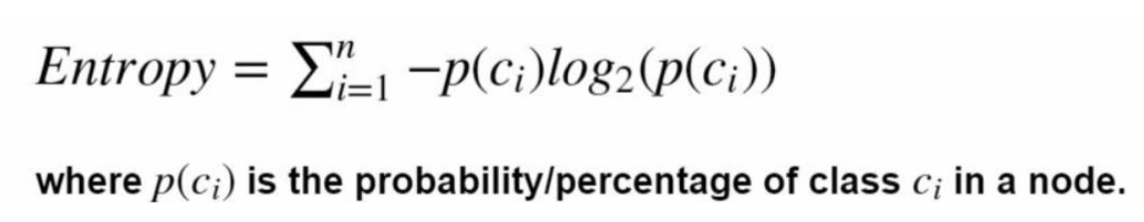

In [6]:
Image('get_label_entropy.png') # 엔트로피 계산 공식

In [7]:
def get_label_entropy(df, label):
    class_total = df[label]          # feature의 전체 데이터
    class_uniq = df[label].unique()  # feature의 고유 데이터
    
    entropy = 0
    for each in class_uniq: # 위 공식에 맞게 계산한다.
        prob = len(class_total.loc[class_total == each]) / len(class_total)
        entropy -=  prob * math.log(prob,2)
    
    return entropy

In [8]:
get_label_entropy(data, 'class_buys_computer') # Info(D) = Entropy(label)

0.9402859586706309

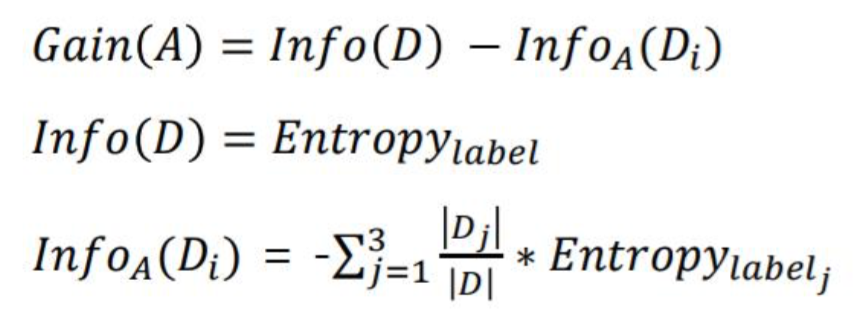

In [9]:
Image('get_attribute_entropy.png') # Feature의 엔트로피 계산 공식

In [10]:
def get_attribute_entropy(df, attribute, label):
    class_total = df[attribute]
    class_uniq  = df[attribute].unique()
    
    entropy = 0
    for each in class_uniq:
        class_positive = len(class_total.loc[class_total == each]) # 해당 클래스에 속하는 데이터의 개수
        prob = class_positive / len(class_total)

        num_label_pos  = len(class_total.loc[(class_total == each) & (df[label] == 'yes')]) 
        num_label_neg  = class_positive - num_label_pos
        
        prob_label_pos = num_label_pos / class_positive # 해당 클래스 데이터 중 label이 yes인 경우 확률
        prob_label_neg = num_label_neg / class_positive # 해당 클래스 데이터 중 label이 no인 경우 확률

        try: # 공식에 맞게 계산한다.
            entropy -= prob * (-(prob_label_pos * math.log(prob_label_pos,2)) - (prob_label_neg * math.log(prob_label_neg,2)))
        except: # log(0) 연산의 Exception에 대한 예외처리
            if prob_label_pos == 0:
                entropy -= prob * (- (prob_label_neg * math.log(prob_label_neg,2)))
            elif prob_label_neg == 0:
                entropy -= prob * (- (prob_label_pos * math.log(prob_label_pos,2)))
    return -entropy
    

In [11]:
get_attribute_entropy(data, 'age', 'class_buys_computer')

0.6935361388961918

In [12]:
info_d               = get_label_entropy(data, 'class_buys_computer')
info_d_age           = get_attribute_entropy(data, 'age', 'class_buys_computer')
info_d_income        = get_attribute_entropy(data, 'income', 'class_buys_computer')
info_d_student       = get_attribute_entropy(data, 'student', 'class_buys_computer')
info_d_credit_rating = get_attribute_entropy(data, 'credit_rating', 'class_buys_computer')

In [13]:
gain_age           = info_d - info_d_age
gain_income        = info_d - info_d_income
gain_student       = info_d - info_d_student
gain_credit_rating = info_d - info_d_credit_rating

In [14]:
gain_age, gain_income, gain_student, gain_credit_rating

(0.2467498197744391,
 0.029222565658954647,
 0.15183550136234136,
 0.04812703040826927)

> Information Gain이 가장 높은 **age**가 가장 정보 획득량이 크다. <br/>
따라서 최초 split attribute은 **age**이다.